<a href="https://colab.research.google.com/github/milad-nourizadeh/Deep-Learning/blob/main/Copy_of_Copy_of_Copy_of_P1_Milad_Nourizadeh_30107120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 Description



Problem Statement: using TensorFlow dataset “beans” https://www.tensorflow.org/datasets/catalog/beans
Build a CNN, to classify the three classes of beans. 2 disease classes and the healthy class.

The required components for Project 1:
1. View example figures with label in 3 x 3 grids
2. Use data augmentation to increase data size
3. Hyperparameter tunning. (Choose one from grid search, random search or Bayesian
Optimization)
4. Use callback to monitor your training.
5. Apply early stopping, learning rate scheduling.
6. Batch normalization
7. Plot the accuracy vs epoch, and loss vs epoch for training and testing data.

**Project Goal:**

The goal is to build a robust machine learning model that is able to distinguish between diseases in the Bean plants. Beans are an important cereal food crop for Africa grown by many small-holder farmers - they are a significant source of proteins for school-age going children in East Africa.

The data is of leaf images representing 3 classes: the healthy class of images, and two disease classes including Angular Leaf Spot and Bean Rust diseases. The model should be able to distinguish between these 3 classes with high accuracy. The end goal is to build a robust, model that can be deployed on a mobile device and used in the field by a farmer.

**Data Set Details**

Description:
Beans is a dataset of images of beans taken in the field using smartphone cameras. It consists of ***3 classes: 2 disease classes and the healthy class***. Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by experts from the National Crops Resources Research Institute (NaCRRI) in Uganda and collected by the Makerere AI research lab.




<br>

*   **class #0 : Leaf with Angular Leaf Spot**
*   **class #1 : Leaf with Bean Rust**
*   **class #2 : Healthy leaf**

<br>





Visualization: [Explore in Know Your Data](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=beans
)

Homepage: https://github.com/AI-Lab-Makerere/ibean/

Source code: tfds.image_classification.Beans

Splits:

test=	128

train =	1034

validation =	133


@ONLINE {beansdata,
    author="Makerere AI Lab",
    title="Bean disease dataset",
    month="January",
    year="2020",
    url="https://github.com/AI-Lab-Makerere/ibean/"
}


# **Step 1:**
##Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import string, random
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization



## Import TensorFlow Datasets and load the data for train, test, and validation 


In [ ]:

datasets , info = tfds.load(name = 'beans', with_info = True, as_supervised = True, split = ['train', 'test', 'validation'])
num_classes = info.features['label'].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete9J083P/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete9J083P/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incomplete9J083P/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


##Input Data

In [ ]:
epochs = 10
batch_size = 32
img_height = 224
img_width = 224


##Data set information:

In [ ]:
info

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

# **Step 2:**
Viewimg example figures with label in 3 x 3 grids




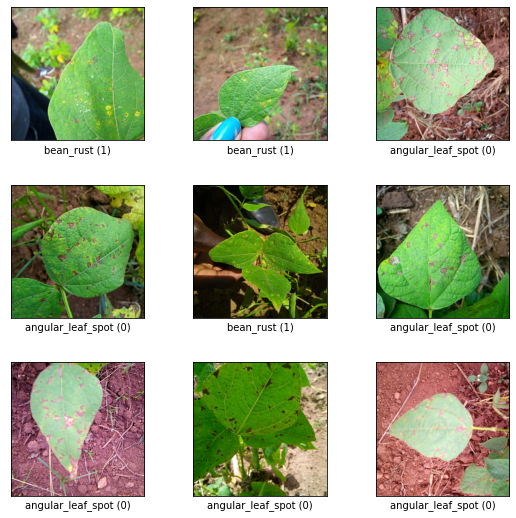

In [ ]:
#print out some examples with labels

fig = tfds.show_examples(datasets[0], info)

# **Step 3:**
Useing data augmentation to increase data size



**Resizing images (Normalization) :**

to scale the data we use following functions:

**ds_train.map:** applies normalization because TFDS returns images in unit8 format while the model requires float32 format. Additionally, it resizes images given the target height and width.


**ds_train.cache:** caches before shuffling


**ds_train.shuffle:** shuffles the training example to ensure randomness and prevent potential class imbalance


**ds_train.batch:** splits the examples into batches


**ds_train.prefetch:** overlaps the preprocessing and model execution work

##Normalization:

In [ ]:
#preprocess images to be fit into the model

def normalize_img(image, label):


  image = tf.image.resize(image, [img_height, img_width])
  imgfloat=tf.cast(image, tf.float32) / 255.
  #label=tf.one_hot(label, 3)
  return imgfloat, label


#ds_train.map: applies normalization because TFDS returns images in unit8 format while the model requires float32 format. Additionally, it resizes images given the target height and width.

train_ds = datasets[0].map(normalize_img).shuffle(100000)
test_ds = datasets[1].map(normalize_img)
valid_ds = datasets[2].map(normalize_img)

train_ds.cache()
valid_ds.cache()

<CacheDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
num_classes = info.features['label'].num_classes
num_classes


class_names = info.features['label'].names
class_names



['angular_leaf_spot', 'bean_rust', 'healthy']

# **Step 4:**
##1- Building CNN Model with sequential_model in Keras:



###Define acceptable accuracy

In [ ]:
# when an aceptable accuracy (lets define 85%) is reached we will stop training acceptable accuracy=0.95
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('val_accuracy')>0.85):
      print('\n Your model had been reached 85% accuracy')
      self.model.stop_training = True

callbacks = myCallback()


##Use sequential_model in Keras:
I have followed the instruction in Keras library:
https://keras.io/guides/sequential_model/

we could use A Sequential model since we have a plain stack of layers where each layer has exactly one input tensor and one output tensor.
In our stack we will start with some basic layers: Convolutional, Pooling, Dropout, and Dense.



*   Convolutional: will create a feature map by convolving an input (image) with a filter
*   Pooling: will perform downsampling along the specific dimension
*   Dropout: will ignore the fraction of units during training to prevent overfitting
*   Dense: will perform a linear operation on the input vector. Also known as fully-connected layer

##Comiling Model:
###following parameters have been use to comlie model:


* optimizer: as Adam is the most commonly used optimizer I have selected Adam for this project.

* learning rate: as it is one of the most important hyper-parameter of the  model. It tells us how quickly the optimizing function is moving towards the minimum of the loss function. greater learning rates will converge faster but It could be unstable. Smaller learning rates are more stable but it will take longer. Generally.

* loss: I have used cross-entropy loss for the softmax output in last layer. There are 2 kinds of cross-entropy loss: binary cross-entropy when number of classes = 2 and categorical cross-entropy when number of classes > 2. We'll choose the categorical cross-entropy.

* metrics: this function characterizes how well our model is predicting class labels. The choice of the metric function should be similar to the loss function. Since we are using binary cross-entropy loss, we can use accuracy as our metric.

In [ ]:
model = keras.Sequential([keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(img_height,img_width,3)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Dropout(0.3),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_classes, activation='softmax')
                          ])
#drop 30% of the weights


model.compile(optimizer = Adam(0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 flatten (Flatten)           (None, 93312)             0

##Training the Model:

In each epoch the algorithm will go through each training batch. also, it will  evaluate the performance on the validation set at the end of each epoch. We are expecting to see reduction in the training and validation loss in later epoches.

In [ ]:
history = model.fit(train_ds.batch(batch_size), epochs = epochs, validation_data = valid_ds.batch(batch_size), callbacks = callbacks)

Epoch 1/10
33/33 [==============================] - 42s 1s/step - loss: 1.8063 - accuracy: 0.4381 - val_loss: 0.9072 - val_accuracy: 0.5865
Epoch 2/10
33/33 [==============================] - 35s 1s/step - loss: 0.7865 - accuracy: 0.6480 - val_loss: 0.6863 - val_accuracy: 0.7293
Epoch 3/10
33/33 [==============================] - 36s 1s/step - loss: 0.5667 - accuracy: 0.7737 - val_loss: 0.7147 - val_accuracy: 0.7143
Epoch 4/10
33/33 [==============================] - 36s 1s/step - loss: 0.4559 - accuracy: 0.8366 - val_loss: 0.5403 - val_accuracy: 0.7444
Epoch 5/10
33/33 [==============================] - 36s 1s/step - loss: 0.3240 - accuracy: 0.8791 - val_loss: 0.5292 - val_accuracy: 0.7820
Epoch 6/10
33/33 [==============================] - 36s 1s/step - loss: 0.2390 - accuracy: 0.9236 - val_loss: 0.5768 - val_accuracy: 0.7444
Epoch 7/10
33/33 [==============================] - 36s 1s/step - loss: 0.1697 - accuracy: 0.9574 - val_loss: 0.5722 - val_accuracy: 0.8120
Epoch 8/10
33/33 [==

##Evaluate model :
##Now we could evaluate our model by using test dataset

In [ ]:
############################################################################################################################################################################################################################################################################################################################

In [ ]:
model.evaluate(test_ds.batch(info.splits['test'].num_examples))


1/1 [==============================] - 2s 2s/step - loss: 0.7149 - accuracy: 0.7656


[0.7148668766021729, 0.765625]

In [ ]:
############################################################################################################################################################################################################################################################################################################################

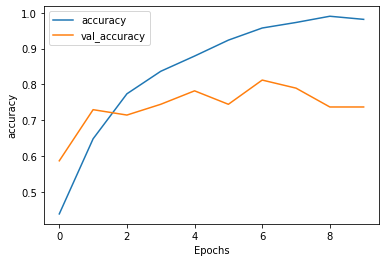

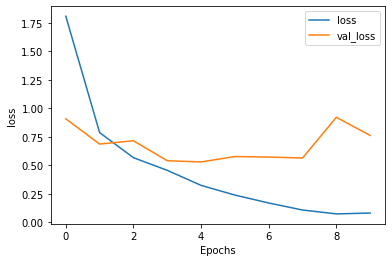

In [ ]:

# Plot the accuracy vs epochs graphs

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#Step 6:
## Apply Augmentation and train the model with extended dataset

## Data augmentation:
[Keras Library](https://www.tensorflow.org/tutorials/images/data_augmentation) has been used to do data augmentation to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation, flip, and zoom.

In [ ]:
data_augmentation = keras.Sequential([
    
    #A preprocessing layer which randomly flips images during training.
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),

    #A preprocessing layer which randomly rotates images during training.
    layers.RandomRotation(0.1),

    #A preprocessing layer which randomly zoomz images during training.
    layers.RandomZoom(0.1),
  ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


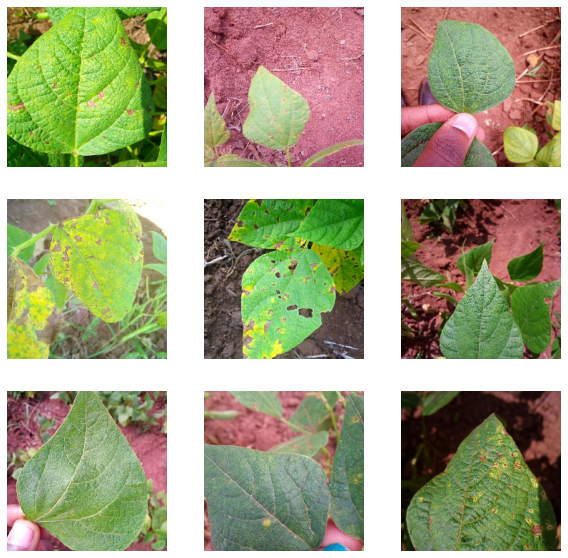

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  for images, labels in train_ds.batch(batch_size).take(i+1):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((augmented_images[0].numpy()*255).astype("uint8"))
    plt.axis("off")


In [ ]:
# when an aceptable accuracy (lets define 85%) is reached we will stop training acceptable accuracy=0.95
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('val_accuracy')>0.85):
      print('\n Your model had been reached 85% accuracy')
      self.model.stop_training = True

callbacks = myCallback()


In [ ]:
model = keras.Sequential([keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(img_height,img_width,3)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Dropout(0.3),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_classes, activation='softmax')
                          ])
#drop 30% of the weights


model.compile(optimizer = Adam(0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 93312)            

In [ ]:
history = model.fit(train_ds.batch(batch_size),
                    epochs = epochs,
                    validation_data = valid_ds.batch(batch_size),
                    callbacks = callbacks
                    )

In [ ]:
############################################################################################################################################################################################################################################################################################################################

In [ ]:
model.evaluate(test_ds.batch(info.splits['test'].num_examples))


In [ ]:
############################################################################################################################################################################################################################################################################################################################

In [ ]:
# Plot the accuracy vs epochs graphs


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

##2- Building CNN Model with MobileNet_V2:


MobileNetV2 is a general architecture and can be used for multiple use cases. Depending on the use case, it can use different input layer size and different width factors. This allows different width models to reduce the number of multiply-adds and thereby reduce inference cost on mobile devices

In [ ]:
#preprocess images to be fit into the model

def normalize_img(image, label):


  image = tf.image.resize(image, [img_height, img_width])
  imgfloat=tf.cast(image, tf.float32) / 255.
  label=tf.one_hot(label, 3)
  return imgfloat, label


#ds_train.map: applies normalization because TFDS returns images in unit8 format while the model requires float32 format. Additionally, it resizes images given the target height and width.

train_ds = datasets[0].map(normalize_img).shuffle(100000)
test_ds = datasets[1].map(normalize_img)
valid_ds = datasets[2].map(normalize_img)

train_ds.cache()
valid_ds.cache()

In [ ]:
feature_extractor = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape = (img_height, img_width, 3))
feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
        feature_extractor_layer,
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(3, activation = 'softmax')
    ])

model.compile(
    optimizer = Adam(0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.summary()



In [ ]:

history = model.fit(train_ds.batch(batch_size), epochs = epochs, validation_data = valid_ds.batch(batch_size))


In [ ]:
############################################################################################################################################################################################################################################################################################################################

In [ ]:
model.evaluate(test_ds.batch(info.splits['test'].num_examples))


In [ ]:
############################################################################################################################################################################################################################################################################################################################

In [ ]:
# Plot the accuracy vs epochs graphs

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Callback and apply early stopping & learning rate reduction:
Callbacks can be passed to keras methods such as fit, evaluate, and predict in order to hook into the various stages of the model training and inference lifecycle.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=2)

In [ ]:
history = model.fit(
  train_ds.batch(batch_size),
  validation_data=valid_ds.batch(batch_size),
   callbacks=[early_stopping, reduce_lr],
  epochs=epochs
)

# Hyperparameter tunning
##Grid Search

In [ ]:
#defining max and min bounds:
pbounds = {'dropout_rate': (0.1, 0.4),
           're_lr_fac': (.1, .2),
           'early_stp_ptnc': (3, 4) }

#Use three for loops to tuning different the parameters
for dropout_rate in pbounds['dropout_rate']:
  for re_lr_fac in pbounds['re_lr_fac']:
    for early_stp_ptnc in pbounds['early_stp_ptnc']:

      print('\n\n__________________________________________________________\n\n')
      print('dropout_rate:', dropout_rate,   '\nre_lr_fac:', re_lr_fac,     '\nearly_stp_ptnc:', early_stp_ptnc )

      reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=re_lr_fac,   
        patience=3, 
        min_lr=0.00001,
        verbose=2
      )

      early_stopping = EarlyStopping(
            monitor='val_loss', 
            patience=early_stp_ptnc, 
            # min_delta=0, 
            # mode='auto'
        )    

      model = tf.keras.Sequential([
              data_augmentation,
              BatchNormalization(),

              feature_extractor_layer,
              tf.keras.layers.Dropout(dropout_rate),
              tf.keras.layers.Dense(3, activation = 'softmax')
          ])




      model.compile(
          optimizer = tf.keras.optimizers.Adam(),
          loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
          metrics = ['acc']
      )

      history = model.fit(train_ds.batch(batch_size),
        validation_data=valid_ds.batch(batch_size),
        callbacks=[early_stopping, reduce_lr],
        epochs=epochs,
        verbose=2
      )

In [ ]:
############################################################################################################################################################################################################################################################################################################################

In [ ]:
model.evaluate(test_ds.batch(info.splits['test'].num_examples))


In [ ]:
############################################################################################################################################################################################################################################################################################################################

#Conclusion:
 

1.   As you can see from the results data Augmentation has been affected the results and increased the accuracy of our model.
2.   When the learning rate is a lower value, the accuracu usually will increase however, it will take longer to converge. So, it needs more epoches.
3. using callback and early stop is an efficeint method to get the desierd accuracy without paying extra computational costs.




**Method** ---------------------------------------- Accuracy Result


---

**Without data augmentation, learning rate = 0.001** ---------------------------------------- accuracy: 0.7344



---

**With data augmentation, learning rate = 0.001** ---------------------------------------- accuracy: 0.7344

---
uhyh


---



---



---

